In [48]:
import pandas as pd
import csv
import sys
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [2]:
csv.field_size_limit(sys.maxsize)

131072

In [3]:
csv.field_size_limit(100000000)

9223372036854775807

In [35]:
commlst = []
with open('comments_de.csv', newline='') as csvfile:
    ids = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in ids:
        commlst.append(','.join(row))

In [38]:
commlst[0]

'How did Bill Gates made his BILLIONS  ?????,"He has NO medical degree  NO science degree / a chip '

In [51]:
analyser = SentimentIntensityAnalyzer()

### Demonstrative Function
Vader works for English as well as for German texts. Keep in mind tho, that it just uses machine translation to English. Still in terms of sentiment analysis, this shouldn't be problematic.

In [55]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [75]:
sentiment_analyzer_scores(commlst[5036])

In fact, this is y we have so few female leaders.  They are not often degenerates that rape, kill and torture others for personal gain. {'neg': 0.353, 'neu': 0.557, 'pos': 0.09, 'compound': -0.8979}


In [47]:
score = analyser.polarity_scores(commlst[1])

In [48]:
score['neg']

0.0

### Usage on videos
Oh and hey - good news. We can also use the same tool for the transcripts of our videos.

In [30]:
vidTexts = pd.read_csv('../DataRetrieval/video_texts.csv')

In [7]:
vidlst = pd.read_csv('../DataRetrieval/videos_more_info.csv')

In [18]:
idlst = pd.read_csv('../DataRetrieval/idlst.csv')

In [43]:
vidTexts = vidTexts.drop('Unnamed: 0', axis=1)

In [44]:
vidlst = vidlst.drop('Unnamed: 0', axis = 1)

In [37]:
vidTexts = vidTexts.rename(columns={'vidID':'Video Id'})

In [32]:
len(vidTexts)

536

In [21]:
len(vidlst)

540

In [47]:
video_df = vidTexts.merge(vidlst, on = 'Video Id', how = 'left')

In [22]:
video_df.loc[:,'lViews'] = np.log(video_df['Views'])

/home/lukas/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [90]:
video_df['Comments Count tool'] = np.sqrt(video_df['Comments Count']+1.2)

/home/lukas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
video_df

,Unnamed: 0,Video Id,vidText,Category,Channel Id,Channel Title,Comments Count,Dislikes Count,Likes Count,Published Day,...,Video Title,Views,vader_neg_prp,vader_pos_prp,vader_neut_prp,vader_compound,Published Day TS,Published Day Num,lViews,Comments Count tool
0,0,Jl3gnP4uG2o,Transcriber: Marcia de Brito\nReviewer: Ariana...,27.0,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,21.0,8.0,162.0,2012-02-21,...,Beethoven as Bill Gates - Jose Bowen at TEDxSM...,38080.0,0.033,0.072,0.895,0.072,2012-02-21,1329782400000000000,10.547444,4.690416
1,1,BX1_2j-QQuk,"Bonjour. Je suis Bill Gates, le président de M...",22.0,UCp2rcO8R6UkBSLs6NjCp-Cw,Ema Krusi,59.0,11.0,357.0,2020-06-03,...,Partie 1 - Comment Bill Gates monopolise la sa...,6621.0,0.011,0.015,0.974,0.015,2020-06-03,1591142400000000000,8.798002,7.745967
2,2,XJn_4cPT6nE,It's important to me to connect with the\npeop...,25.0,UCZKASNi4Nm27rw3gfUIjEKA,Maricopa County,1.0,1.0,3.0,2019-01-11,...,Chairman Bill Gates' Coffee Habit,357.0,0.017,0.172,0.810,0.172,2019-01-11,1547164800000000000,5.877736,1.414214
3,3,OAx_6-wdslM,"[music] Everywhere you look, computers are cha...",27.0,UCJyEBMU1xVP2be1-AoGS1BA,Code.org,4.0,165.0,4083.0,2018-01-30,...,Introducing How Computers Work,532795.0,0.000,0.025,0.975,0.025,2018-01-30,1517270400000000000,13.185892,2.236068
4,4,gTjXTRz4dDw,"For a good read this summer, try these five\nb...",25.0,UCnEiGCE13SUI7ZvojTAVBKw,Bill Gates,903.0,294.0,25111.0,2019-05-20,...,5 books to read this summer,539436.0,0.089,0.246,0.665,0.246,2019-05-20,1558310400000000000,13.198279,30.066593
5,5,_0QdI0rVoHA,"Hi everyone, it's Jerry. Ever since Magnus Car...",27.0,UCCDOQrpqLqKVcTCKzqarxLg,ChessNetwork,1225.0,3757.0,25313.0,2014-01-24,...,How Magnus Carlsen checkmated Bill Gates in 9 ...,5028970.0,0.052,0.140,0.807,0.140,2014-01-24,1390521600000000000,15.430726,35.014283
6,6,bIuhCUxpPsQ,UPDATE FOR YOU ON EYEWITNESS NEWS AT SIX. (MM)...,25.0,UCnwI-VN5jXWIGQKOI9PMDMw,WPRI,0.0,0.0,1.0,2017-11-17,...,Doctor: Bill Gates donation could have huge im...,79.0,0.038,0.069,0.893,0.069,2017-11-17,1510876800000000000,4.369448,1.000000
7,7,aVtD0swv94c,(Image source: Wikimedia Commons / Kees de\nVo...,28.0,UCB0QyTJ3lQUDmE0yZqiuQuA,Newsy Tech,22.0,10.0,31.0,2013-08-10,...,Bill Gates Isn't Too Happy with Google's Proje...,6553.0,0.050,0.127,0.823,0.127,2013-08-10,1376092800000000000,8.787678,4.795832
8,8,zwGdnCNi8Ss,"Da Vinci lived from 1452 to 1519, so it’s the ...",29.0,UCnEiGCE13SUI7ZvojTAVBKw,Bill Gates,473.0,99.0,7496.0,2018-12-18,...,Leonardo da Vinci’s Notebook: The Codex Leicester,264809.0,0.031,0.091,0.878,0.091,2018-12-18,1545091200000000000,12.486764,21.771541
10,10,ogMEpsGh9Yo,ON ON IMPEACHMENT ON IMPEACHMENT INQUIRY. ON I...,25.0,UCp1KrVaZDZ7BOI_QBuTWWmg,KING 5,171.0,281.0,265.0,2019-09-25,...,Bill & Melinda Gates Foundation under fire ove...,35504.0,0.087,0.168,0.745,0.168,2019-09-25,1569369600000000000,10.477401,13.114877


In [78]:
now = datetime.datetime.now()

In [80]:
print(now)

2020-06-18 11:35:02.966128


In [62]:
scorelst = []
for i in range(len(video_df)):
    scorelst.append(sentiment_analyzer_scores(video_df['vidText'][i]))

In [60]:
video_df['Published Day TS'] = [pd.Timestamp(i) for i in video_df['Published Day']]

/home/lukas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
video_df['Published Day Num'] = video_df['Published Day TS'].astype(np.int64)

/home/lukas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
video_df = video_df.dropna(subset = ['Channel Id'])

In [43]:
max(video_df['Comments Count tool'])

677.039142147631

In [66]:
import matplotlib.dates as mdate
import numpy as np
import datetime as dt

In [83]:
dates = [pd.to_datetime(d) for d in video_df['Published Day']]

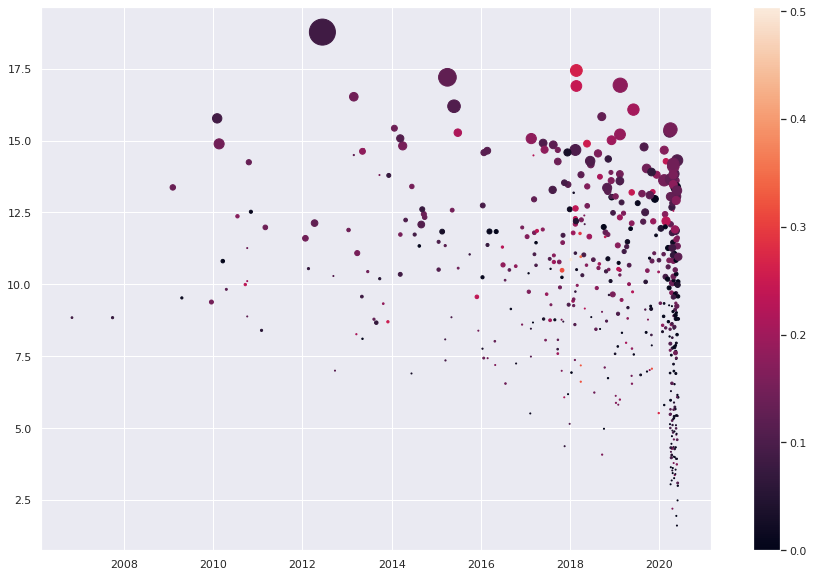

In [93]:
plt.figure(figsize=(15,10))
ax.set_title('Sentiment of Videos over time and comment-interaction', fontsize = 25)
plt.scatter(dates, video_df['lViews'], s=video_df['Comments Count tool'], c= video_df['vader_compound'])
plt.colorbar()

plt.show()

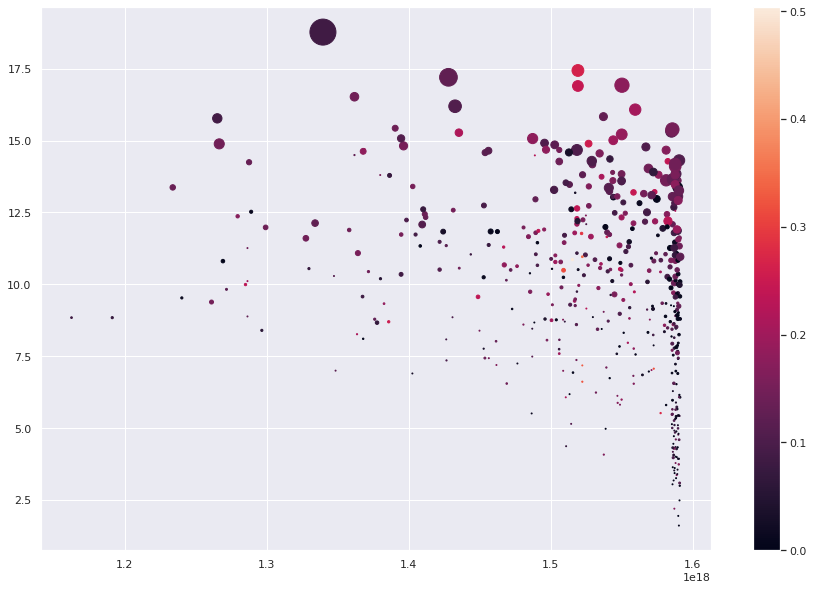

In [80]:
plt.figure(figsize=(15,10))

sns.set(style="darkgrid")
plt.scatter(x=video_df['Published Day Num'], y=video_df['lViews'], c = video_df['vader_compound'], s= video_df['Comments Count tool'])
#plt.xticks(video_df['Published Day Num'].astype(datetime.datetime))
plt.colorbar()

plt.show()

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1080x720 with 0 Axes>

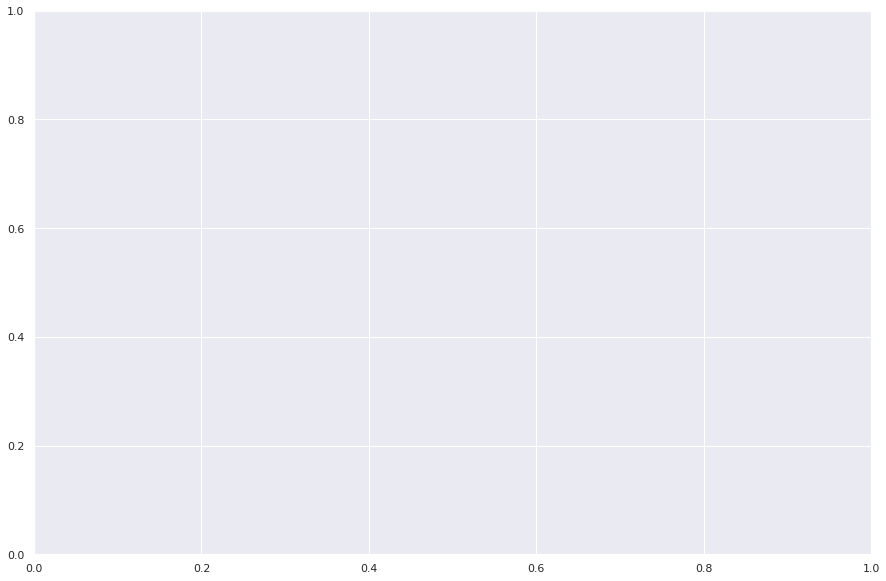

In [34]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax1 = video_df.plot.scatter(x='Published Day Num', y='lViews', c = 'vader_compound', s= 'Comments Count tool', figsize = (15,10))
#ax.set_xticklabels([datetime.fromtimestamp(ts / 1e9).strftime('%H:%M:%S') for ts in ax.get_xticks()])

plt.tight_layout()
plt.show()

In [69]:
video_df = video_df.assign(vader_neg_prp=[i['neg'] for i in scorelst],
                vader_pos_prp = [i['pos'] for i in scorelst],
                vader_neut_prp = [i['neu'] for i in scorelst],
                vader_compound = [i['pos'] for i in scorelst])


In [70]:
video_df.to_csv('videos_full_info_sentiment.csv')

In [7]:
video_df = pd.read_csv('videos_full_info_sentiment.csv')